# Data Processing
Run all and remember to upload the results spreadsheet when prompted in the first code block.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import math
from scipy.stats import norm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# Select the file for our dataset, upload it from your
# local files.
uploaded = files.upload()



Saving Results.xlsx to Results.xlsx


In [ ]:
df = pd.read_excel('Results.xlsx')
reactions = df['Reaction Time (s)']
intensity = df['Intensity (% PWM)']
condition = df['Condition']
I_perceived = df['Perceived Intensity (Converted to PWM)']
I_actual = df['PWM Values']


In [ ]:
RowsMissed = {"condition":[], "index":[]}
for i in range(len(reactions)):
  if type(reactions[i]) == str:
    RowsMissed["index"].append(i)
    RowsMissed["condition"].append(condition[i])



print(RowsMissed)

RefinedReactions = reactions.drop(RowsMissed["index"])
RefinedIntensity = intensity.drop(RowsMissed["index"])
RefinedCondition = condition.drop(RowsMissed["index"])
RefinedI_perceived = I_perceived.drop(RowsMissed["index"])
RefinedI_actual = I_actual.drop(RowsMissed["index"])

RefinedReactions = RefinedReactions.reset_index(drop = True)
RefinedIntensity = RefinedIntensity.reset_index(drop = True)
RefinedCondition = RefinedCondition.reset_index(drop = True)
RefinedI_perceived = RefinedI_perceived.reset_index(drop = True)
RefinedI_actual = RefinedI_actual.reset_index(drop = True)

print(len(RefinedReactions), len(RefinedIntensity), len(RefinedCondition), len(RefinedI_perceived), len(RefinedI_actual))

{'condition': ['physical', 'none', 'none', 'physical', 'physical', 'verbal', 'verbal', 'verbal', 'verbal', 'verbal', 'none', 'none', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'verbal', 'verbal', 'none', 'none', 'verbal', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'verbal', 'verbal', 'verbal', 'physical', 'physical', 'physical', 'none', 'physical', 'none', 'physical', 'physical', 'physical', 'physical', 'verbal', 'verbal', 'none', 'physical', 'physical', 'physical', 'none', 'physical', 'physical', 'physical', 'physical', 'verbal', 'verbal', 'physical', 'verbal', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'physical', 'none', 'none', 'none', 'verbal', 'verbal', 'verbal', 'physical', 'none', 'none', 'verbal', 'verbal', 'physical', 'physical', 'physical', 'none', 'physical', 'physical', 'physical', 'physical', 'verbal', '

In [ ]:
none = {"name":"No Task", "r":[], "i":[], "pi":[], "ai":[], "missed": 0}
build = {"name":"Physical Task", "r":[], "i":[], "pi":[], "ai":[], "missed": 0}
seven = {"name":"Verbal Task", "r":[], "i":[], "pi":[], "ai":[], "missed": 0}
for i in range(len(RefinedCondition)):
  if RefinedCondition[i] == 'none':
    none["r"].append(RefinedReactions[i])
    none["i"].append(RefinedIntensity[i])
    none["pi"].append(RefinedI_perceived[i])
    none["ai"].append(RefinedI_actual[i])

  if RefinedCondition[i] == 'physical':
    build["r"].append(RefinedReactions[i])
    build["i"].append(RefinedIntensity[i])
    build["pi"].append(RefinedI_perceived[i])
    build["ai"].append(RefinedI_actual[i])

  if RefinedCondition[i] == 'verbal':
    seven["r"].append(RefinedReactions[i])
    seven["i"].append(RefinedIntensity[i])
    seven["pi"].append(RefinedI_perceived[i])
    seven["ai"].append(RefinedI_actual[i])

for i in range(len(RowsMissed["condition"])):
  if RowsMissed["condition"][i] == 'none':
    none["missed"] += 1
  if RowsMissed["condition"][i] == 'physical':
    build["missed"] += 1
  if RowsMissed["condition"][i] == 'verbal':
    seven["missed"] += 1

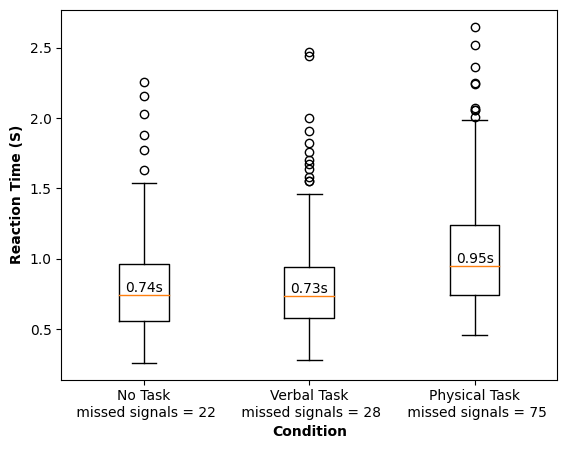

In [ ]:
import matplotlib.pyplot as plt

ToPlot = [none["r"], seven["r"],  build["r"]]

fig = plt.boxplot(ToPlot)
plt.xticks([1, 2, 3], [none["name"] + "\n missed signals = " + str(none["missed"]),
                      seven["name"] + "\n missed signals = " + str(seven["missed"]),
                      build["name"] + "\n missed signals = " + str(build["missed"])])

# Add median values to the plot
medians = [median.get_ydata()[0] for median in fig['medians']]
for median, x in zip(medians, [1, 2, 3]):
    plt.text(x, median, f'{median:.2f}' + 's', ha='center', va='bottom')

plt.xlabel('Condition', fontweight='bold')
plt.ylabel('Reaction Time (S)', fontweight='bold')

plt.show()

Text(0, 0.5, 'Reaction Time (S)')

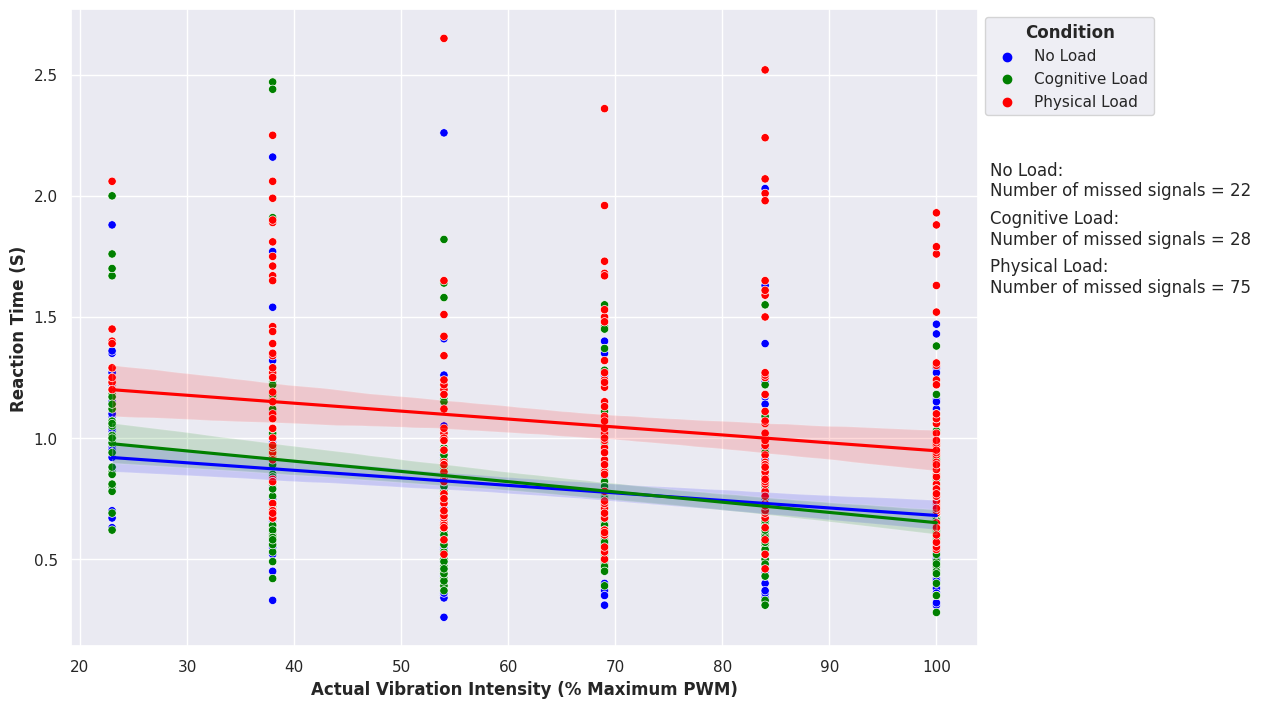

In [ ]:
import seaborn as sns
import pandas as pd

# Convert dictionaries to DataFrames
none_df = pd.DataFrame(none)
build_df = pd.DataFrame(build)
seven_df = pd.DataFrame(seven)

# Add a 'Condition' column to identify the datasets
none_df['Condition'] = 'No Load'
build_df['Condition'] = 'Physical Load'
seven_df['Condition'] = 'Cognitive Load'

# Combine the data from all datasets into a single DataFrame
combined_data = pd.concat([none_df, seven_df, build_df])

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(
    data=combined_data, x="i", y="r", hue="Condition", palette=["blue", "green", "red"]
)
sns.regplot(data=none_df, x="i", y="r", line_kws={"color": "blue"}, scatter=False);
sns.regplot(data=seven_df, x="i", y="r", line_kws={"color": "green"}, scatter=False);
sns.regplot(data=build_df, x="i", y="r", line_kws={"color": "red"}, scatter=False);

legend = ax.legend()
legend.set_title("Condition", prop={'weight': 'bold'})

for text in legend.get_texts():
    text.set_weight('bold')

ax.text(105, 2.00, none_df['Condition'][0] + ": \nNumber of missed signals = " + str(none["missed"]))
ax.text(105, 1.80, seven_df['Condition'][0] + ": \nNumber of missed signals = " + str(seven["missed"]))
ax.text(105, 1.60, build_df['Condition'][0] + ": \nNumber of missed signals = " + str(build["missed"]))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), labelspacing=0.5)
ax.set(xlabel='Actual Vibration Intensity (% Maximum PWM)', ylabel='Reaction Time (S)')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})

Text(0, 0.5, 'Reaction Time (S)')

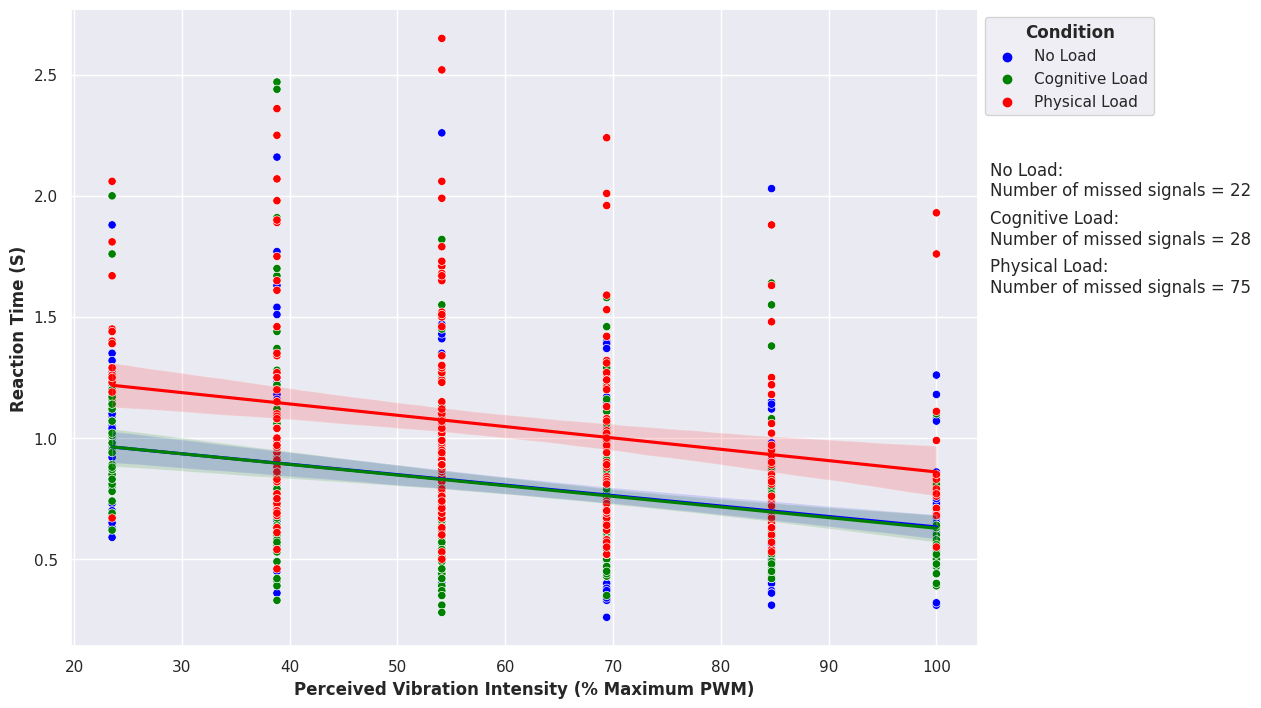

In [ ]:
import seaborn as sns
import pandas as pd

# Convert dictionaries to DataFrames
scaled_none_df = pd.DataFrame(none)
scaled_build_df = pd.DataFrame(build)
scaled_seven_df = pd.DataFrame(seven)

# Add a 'Condition' column to identify the datasets
scaled_none_df['Condition'] = 'No Load'
scaled_build_df['Condition'] = 'Physical Load'
scaled_seven_df['Condition'] = 'Cognitive Load'


scaled_none_df["pi"] = none_df["pi"]*(100/255)
scaled_seven_df["pi"] = seven_df["pi"]*(100/255)
scaled_build_df["pi"] = build_df["pi"]*(100/255)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Combine the data from all datasets into a single DataFrame
scaled_combined_data = pd.concat([scaled_none_df, scaled_seven_df, scaled_build_df])
ax = sns.scatterplot(
    data=scaled_combined_data, x="pi", y="r", hue="Condition", palette=["blue", "green", "red"]
)
sns.regplot(data=scaled_none_df, x="pi", y="r", line_kws={"color": "blue"}, scatter=False);
sns.regplot(data=scaled_seven_df, x="pi", y="r", line_kws={"color": "green"}, scatter=False);
sns.regplot(data=scaled_build_df, x="pi", y="r", line_kws={"color": "red"}, scatter=False);

legend = ax.legend()
legend.set_title("Condition", prop={'weight': 'bold'})

for text in legend.get_texts():
    text.set_weight('bold')

ax.text(105, 2.00, none_df['Condition'][0] + ": \nNumber of missed signals = " + str(none["missed"]))
ax.text(105, 1.80, seven_df['Condition'][0] + ": \nNumber of missed signals = " + str(seven["missed"]))
ax.text(105, 1.60, build_df['Condition'][0] + ": \nNumber of missed signals = " + str(build["missed"]))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), labelspacing=0.5)
ax.set(xlabel='Perceived Vibration Intensity (% Maximum PWM)', ylabel='Reaction Time (S)')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})


# Above Plot
- the line is the regression line (line of best fit) for each condition
- the shaded area is the 95% confidence region.



In [ ]:
# THIS CODE BLOCK ORGANISES THE MISSES INTO CONDITION AND PWM VALUE
miss_df = pd.read_excel('Results.xlsx')
reactions = df['Reaction Time (s)']
condition = df['Condition']
I_actual = df['PWM Values']

# dictionary with six values for each condition to count the number of misses
organised_misses = {"none_miss":[0,0,0,0,0,0],"seven_miss":[0,0,0,0,0,0],"build_miss":[0,0,0,0,0,0],}
for i in range(len(I_actual)):
  if type(reactions[i]) == str:
    if I_actual[i] == 60:
      if condition[i] == "none":
        organised_misses["none_miss"][0] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][0] +=1
      else:
        organised_misses["build_miss"][0] +=1
    elif I_actual[i] == 99:
      if condition[i] == "none":
        organised_misses["none_miss"][1] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][1] +=1
      else:
        organised_misses["build_miss"][1] +=1
    elif I_actual[i] == 138:
      if condition[i] == "none":
        organised_misses["none_miss"][2] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][2] +=1
      else:
        organised_misses["build_miss"][2] +=1
    elif I_actual[i] == 177:
      if condition[i] == "none":
        organised_misses["none_miss"][3] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][3] +=1
      else:
        organised_misses["build_miss"][3] +=1
    elif I_actual[i] == 216:
      if condition[i] == "none":
        organised_misses["none_miss"][4] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][4] +=1
      else:
        organised_misses["build_miss"][4] +=1
    elif I_actual[i] == 255:
      if condition[i] == "none":
        organised_misses["none_miss"][5] +=1
      elif condition[i] == "verbal":
        organised_misses["seven_miss"][5] +=1
      else:
        organised_misses["build_miss"][5] +=1
print(organised_misses)

{'none_miss': [19, 1, 0, 1, 1, 0], 'seven_miss': [26, 0, 1, 1, 0, 0], 'build_miss': [44, 10, 5, 5, 7, 4]}


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.3568627450980392, 0.7137254901960784, 0.9921568627450981), (0.3568627450980392, 0.7137254901960784, 0.9921568627450981), (0.3568627450980392, 0.7137254901960784, 0.9921568627450981), (0.3568627450980392, 0.7137254901960784, 0.9921568627450981), (0.3568627450980392, 0.7137254901960784, 0.9921568627450981), (0.3568627450980392, 0.7137254901960784, 0.9921568627450981)]) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


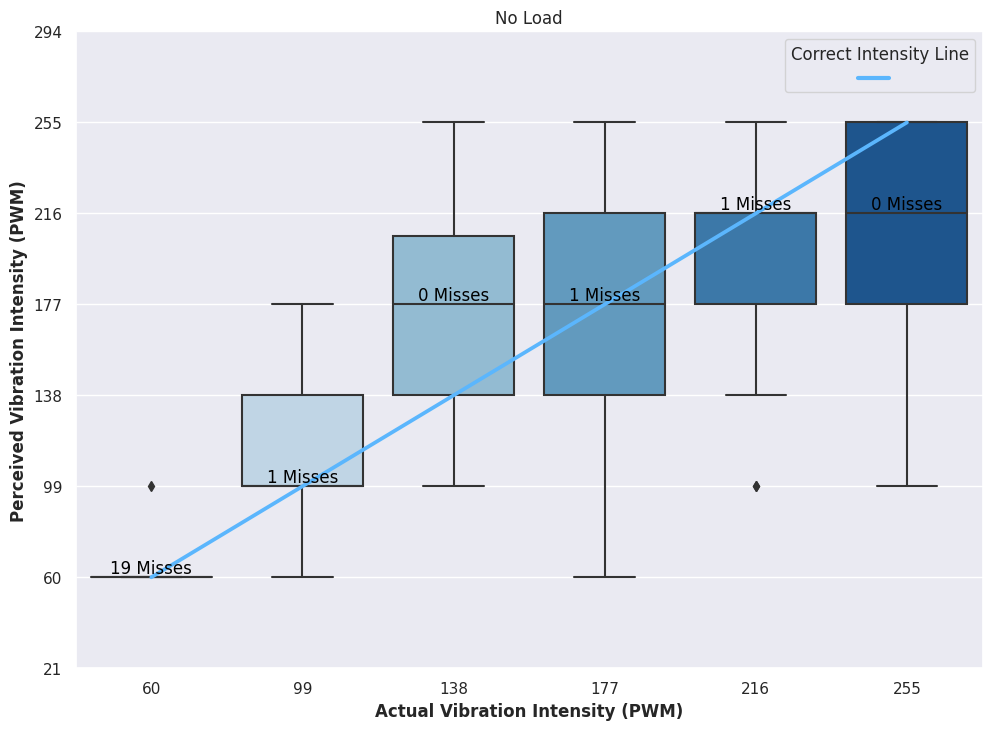

In [ ]:
# PERCEIVED VS ACTUAL FOR NONE CONDITION
separated_intensities = {"actual":[], "perceived":[]}
for i in range(len(none_df["ai"])):
  if none_df["ai"][i] == 60:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])
  elif none_df["ai"][i] == 99:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])
  elif none_df["ai"][i] == 138:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])
  elif none_df["ai"][i] == 177:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])
  elif none_df["ai"][i] == 216:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])
  elif none_df["ai"][i] == 255:
    separated_intensities["actual"].append(none_df["ai"][i])
    separated_intensities["perceived"].append(none_df["pi"][i])


si = pd.DataFrame(separated_intensities)
correct_line = {"x":[60,99,138,177,216,255],"y":[60,99,138,177,216,255]}
correct_line_df = pd.DataFrame(correct_line)
# sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.pointplot(x=si["actual"], y=si["actual"], color="#5BB6FD",markers='');
ax = sns.boxplot(x=si["actual"], y=si["perceived"], palette="Blues",zorder=1);
ax.set(xlabel='Actual Vibration Intensity (PWM)', ylabel='Perceived Vibration Intensity (PWM)')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.yticks([21,60,99,138,177,216,255,294], ["21","60","99","138","177","216","255","294"])
# Add median values to the plot
medians = si.groupby(['actual'])['perceived'].median()

for miss, x in zip(organised_misses["none_miss"], [0,1,2,3,4,5]):
    plt.text(x, medians[correct_line_df["x"][x]] , f'{miss}' + ' Misses', ha="center", va="bottom", color='black')
plt.title("No Load")
from matplotlib.lines import Line2D
custom_legend_entry = Line2D([0], [0], color='#5BB6FD', linewidth=3, label='')
plt.legend(handles=[custom_legend_entry],title="Correct Intensity Line")

     actual  perceived
0       216      177.0
1        99      138.0
2       255      216.0
3       177      216.0
4        99       99.0
..      ...        ...
297     177      255.0
298     138      216.0
299     216      255.0
300      99      138.0
301     138      255.0

[302 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.3803921568627451, 0.9921568627450981, 0.34901960784313724), (0.3803921568627451, 0.9921568627450981, 0.34901960784313724), (0.3803921568627451, 0.9921568627450981, 0.34901960784313724), (0.3803921568627451, 0.9921568627450981, 0.34901960784313724), (0.3803921568627451, 0.9921568627450981, 0.34901960784313724), (0.3803921568627451, 0.9921568627450981, 0.34901960784313724)]) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


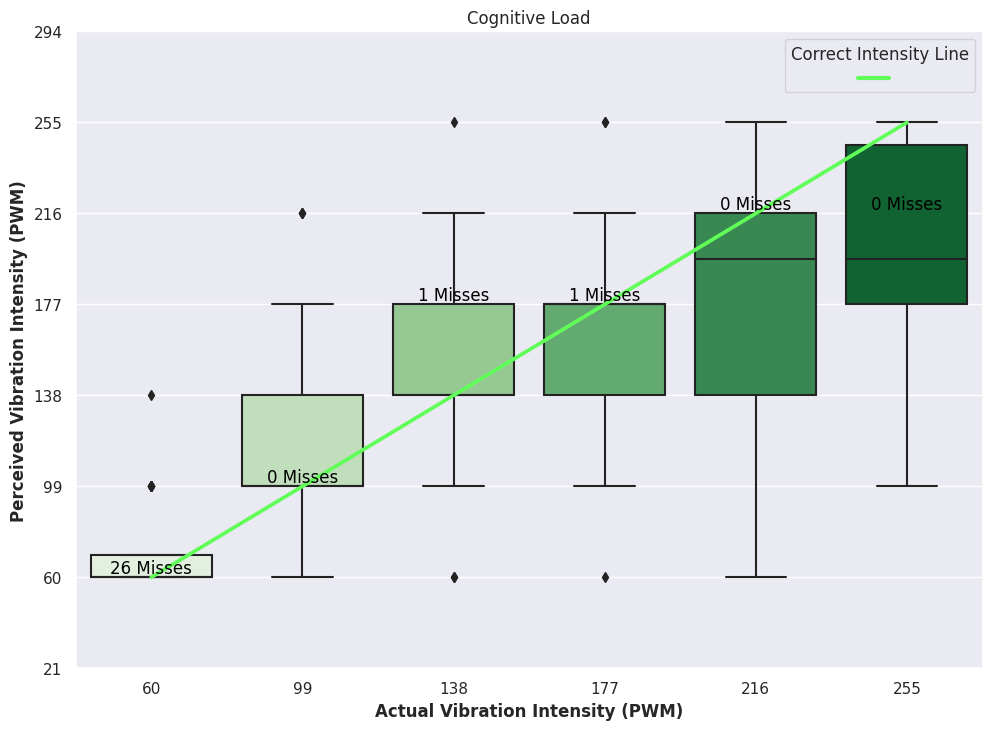

In [ ]:
# PERCEIVED VS ACTUAL FOR COGNITIVE CONDITION
separated_intensities = {"actual":[], "perceived":[]}
for i in range(len(seven_df["ai"])):
  if seven_df["ai"][i] == 60:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])
  elif seven_df["ai"][i] == 99:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])
  elif seven_df["ai"][i] == 138:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])
  elif seven_df["ai"][i] == 177:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])
  elif seven_df["ai"][i] == 216:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])
  elif seven_df["ai"][i] == 255:
    separated_intensities["actual"].append(seven_df["ai"][i])
    separated_intensities["perceived"].append(seven_df["pi"][i])


S_si = pd.DataFrame(separated_intensities)
print(si)

correct_line = {"x":[60,99,138,177,216,255],"y":[60,99,138,177,216,255]}
correct_line_df = pd.DataFrame(correct_line)
# sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.pointplot(x=S_si["actual"], y=S_si["actual"], color="#61FD59",markers='');
ax = sns.boxplot(x=S_si["actual"], y=S_si["perceived"], palette="Greens",zorder=1);
ax.set(xlabel='Actual Vibration Intensity (PWM)', ylabel='Perceived Vibration Intensity (PWM)')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.yticks([21,60,99,138,177,216,255,294], ["21","60","99","138","177","216","255","294"])
# Add median values to the plot
medians = si.groupby(['actual'])['perceived'].median()

for miss, x in zip(organised_misses["seven_miss"], [0,1,2,3,4,5]):
    plt.text(x, medians[correct_line_df["x"][x]] , f'{miss}' + ' Misses', ha="center", va="bottom", color='black')
plt.title("Cognitive Load")
from matplotlib.lines import Line2D
custom_legend_entry = Line2D([0], [0], color='#61FD59', linewidth=3, label='')
plt.legend(handles=[custom_legend_entry],title="Correct Intensity Line")


     actual  perceived
0       216      177.0
1        99      138.0
2       255      216.0
3       177      216.0
4        99       99.0
..      ...        ...
297     177      255.0
298     138      216.0
299     216      255.0
300      99      138.0
301     138      255.0

[302 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(0.9882352941176471, 0.34509803921568627, 0.34509803921568627), (0.9882352941176471, 0.34509803921568627, 0.34509803921568627), (0.9882352941176471, 0.34509803921568627, 0.34509803921568627), (0.9882352941176471, 0.34509803921568627, 0.34509803921568627), (0.9882352941176471, 0.34509803921568627, 0.34509803921568627), (0.9882352941176471, 0.34509803921568627, 0.34509803921568627)]) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


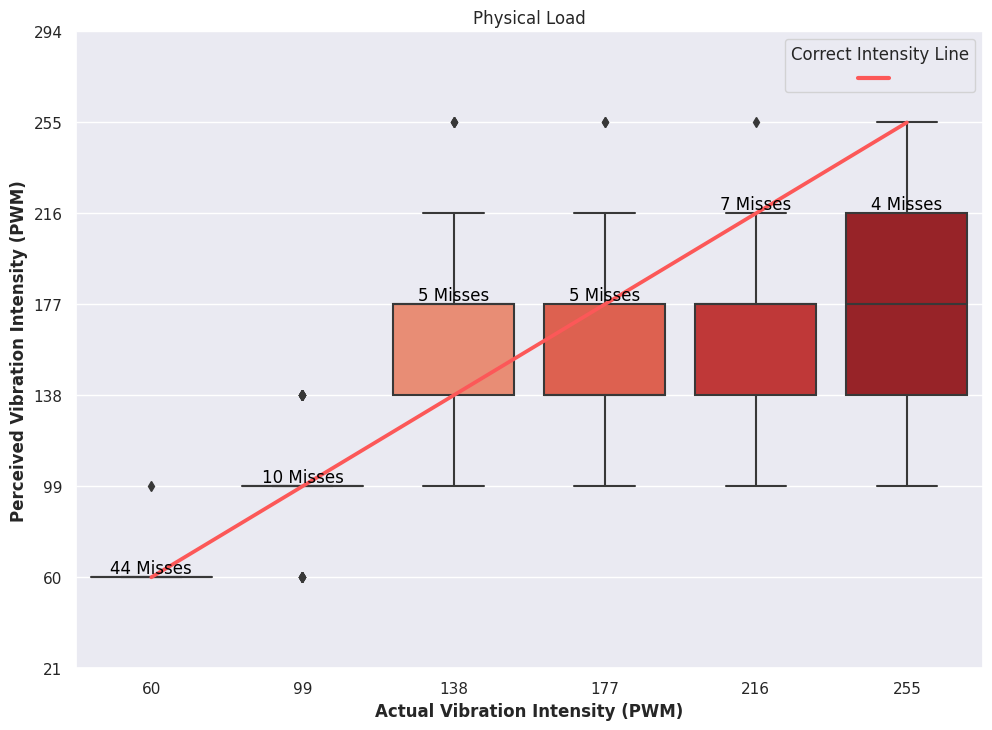

In [ ]:
# PERCEIVED VS ACTUAL FOR PHYSICAL CONDITION
separated_intensities = {"actual":[], "perceived":[]}
for i in range(len(build_df["ai"])):
  if build_df["ai"][i] == 60:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])
  elif build_df["ai"][i] == 99:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])
  elif build_df["ai"][i] == 138:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])
  elif build_df["ai"][i] == 177:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])
  elif build_df["ai"][i] == 216:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])
  elif build_df["ai"][i] == 255:
    separated_intensities["actual"].append(build_df["ai"][i])
    separated_intensities["perceived"].append(build_df["pi"][i])


B_si = pd.DataFrame(separated_intensities)
print(si)

correct_line = {"x":[60,99,138,177,216,255],"y":[60,99,138,177,216,255]}
correct_line_df = pd.DataFrame(correct_line)
# sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.pointplot(x=B_si["actual"], y=B_si["actual"], color="#FC5858",markers='');
ax = sns.boxplot(x=B_si["actual"], y=B_si["perceived"], palette="Reds",zorder=1);
ax.set(xlabel='Actual Vibration Intensity (PWM)', ylabel='Perceived Vibration Intensity (PWM)')
ax.set_xlabel(ax.get_xlabel(), fontdict={'weight': 'bold'})
ax.set_ylabel(ax.get_ylabel(), fontdict={'weight': 'bold'})
plt.yticks([21,60,99,138,177,216,255,294], ["21","60","99","138","177","216","255","294"])
# Add median values to the plot
medians = si.groupby(['actual'])['perceived'].median()

for miss, x in zip(organised_misses["build_miss"], [0,1,2,3,4,5]):
    plt.text(x, medians[correct_line_df["x"][x]] , f'{miss}' + ' Misses', ha="center", va="bottom", color='black')
plt.title("Physical Load")
from matplotlib.lines import Line2D
custom_legend_entry = Line2D([0], [0], color='#FC5858', linewidth=3, label='')
plt.legend(handles=[custom_legend_entry],title="Correct Intensity Line")


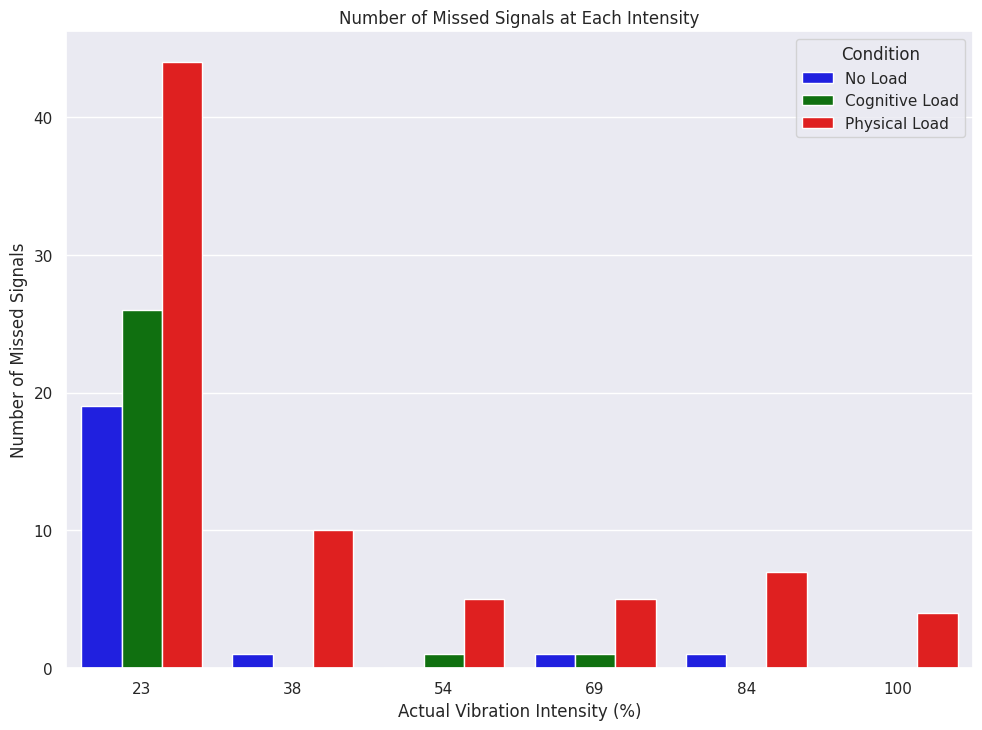

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your code to create si, correct_line_df, and organised_misses)

# Create a DataFrame for the miss counts
miss_counts = {
    "intensity": [23,38,54,69,84,100],
    "No Load": organised_misses["none_miss"],
    "Cognitive Load": organised_misses["seven_miss"],
    "Physical Load": organised_misses["build_miss"]
}
miss_counts_df = pd.DataFrame(miss_counts)

# Melt the DataFrame for better visualization
melted_miss_counts = miss_counts_df.melt(id_vars=["intensity"], var_name="condition", value_name="misses")

# Create the bar plot
sns.set(rc={'figure.figsize': (11.7, 8.27)})
ax = sns.barplot(x="intensity", y="misses", hue="condition", data=melted_miss_counts,  palette=["blue", "green", "red"])

# Set labels and title
ax.set(xlabel='Actual Vibration Intensity (%)', ylabel='Number of Missed Signals')
plt.title('Number of Missed Signals at Each Intensity')

# Show the plot
plt.legend(title="Condition")
plt.show()

# P-VALUES

In [ ]:
# CHECK STATISTICAL SIGNIFICANCE OF THREE PARAMETRIC CONDITIONS WITH ONE-WAY ANOVA TEST
# Importing library
from scipy.stats import f_oneway

# Conduct the one-way ANOVA

#REACTION TIMES
print(f_oneway(none_df["r"], build_df["r"], seven_df["r"]))




# is there any statistical difference between pleasantness ratings across the conditions and intensities?
iterate = [none, build, seven]

lvl1 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}
lvl2 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}
lvl3 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}
lvl4 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}
lvl5 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}
lvl6 = {'No Task':[], 'Physical Task':[], 'Verbal Task':[]}


# This code compares the statistical significance across each intensity across each condition.
# extend for the other 4 levels.
for j in iterate:
  for i in range(len(j['i'])):
    if j['ai'][i] == 60:
      lvl1[j['name']].append(j['pi'][i])
    elif j['ai'][i] == 99:
      lvl2[j['name']].append(j['pi'][i])
    elif j['ai'][i] == 138:
      lvl3[j['name']].append(j['pi'][i])
    elif j['ai'][i] == 177:
      lvl4[j['name']].append(j['pi'][i])
    elif j['ai'][i] == 216:
      lvl5[j['name']].append(j['pi'][i])
    elif j['ai'][i] == 255:
      lvl6[j['name']].append(j['pi'][i])
print(lvl2)
print(lvl3)


print("\n")
print("STATS ON THE PERCEIVED INTENSITIES ACROSS EACH LEVEL AND CONDITION")
print("level 1 across conditions")
print(f_oneway(lvl1['No Task'], lvl1['Physical Task'], lvl1['Verbal Task']),"\n")
print("level 2 across conditions")
print(f_oneway(lvl2['No Task'], lvl2['Physical Task'], lvl2['Verbal Task']),"\n")
print("level 3 across conditions")
print(f_oneway(lvl3['No Task'], lvl3['Physical Task'], lvl3['Verbal Task']),"\n")
print("level 4 across conditions")
print(f_oneway(lvl4['No Task'], lvl4['Physical Task'], lvl4['Verbal Task']),"\n")
print("level 5 across conditions")
print(f_oneway(lvl5['No Task'], lvl5['Physical Task'], lvl5['Verbal Task']),"\n")
print("level 6 across conditions")
print(f_oneway(lvl6['No Task'], lvl6['Physical Task'], lvl6['Verbal Task']),"\n")



F_onewayResult(statistic=47.17808659939105, pvalue=3.778649028789659e-20)
{'No Task': [138.0, 99.0, 99.0, 138.0, 99.0, 60.0, 99.0, 99.0, 99.0, 99.0, 99.0, 60.0, 99.0, 177.0, 99.0, 99.0, 138.0, 99.0, 60.0, 99.0, 99.0, 177.0, 99.0, 99.0, 138.0, 177.0, 99.0, 60.0, 138.0, 99.0, 177.0, 99.0, 138.0, 99.0, 99.0, 138.0, 60.0, 99.0, 99.0, 99.0, 99.0, 60.0, 138.0, 177.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 60.0, 138.0, 138.0], 'Physical Task': [99.0, 99.0, 99.0, 60.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 60.0, 99.0, 99.0, 138.0, 99.0, 60.0, 60.0, 60.0, 99.0, 99.0, 138.0, 138.0, 99.0, 60.0, 99.0, 138.0, 138.0, 138.0, 99.0, 99.0, 99.0, 99.0, 99.0, 138.0, 99.0, 138.0, 99.0, 99.0, 138.0, 60.0, 99.0, 99.0, 99.0, 99.0], 'Verbal Task': [99.0, 99.0, 99.0, 60.0, 99.0, 99.0, 138.0, 138.0, 99.0, 60.0, 99.0, 99.0, 138.0, 138.0, 177.0, 99.0, 99.0, 99.0, 60.0, 60.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 99.0, 60.0, 138.0, 216.0, 216.0, 216.0, 99.0, 99.0, 138.0, 99.0, 99.0, 60.0, 60.0, 60.0, 138.0, 99.0, 99.0, 99

In [ ]:
# NUMBER OF CORRECTLY PREDICTED INTENSITIES
lvl1 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}
lvl2 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}
lvl3 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}
lvl4 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}
lvl5 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}
lvl6 = {'No Task':0, 'Physical Task':0, 'Verbal Task':0}


for j in iterate:
  for i in range(len(j['i'])):
    if j['ai'][i] == 60:
      if j['pi'][i] == 60:
        lvl1[j['name']] += 1
    elif j['ai'][i] == 99:
      if j['pi'][i] == 99:
        lvl2[j['name']] += 1
    elif j['ai'][i] == 138:
      if j['pi'][i] == 138:
        lvl3[j['name']] += 1
    elif j['ai'][i] == 177:
      if j['pi'][i] == 177:
        lvl4[j['name']] += 1
    elif j['ai'][i] == 216:
      if j['pi'][i] == 216:
        lvl5[j['name']] += 1
    elif j['ai'][i] == 255:
      if j['pi'][i] == 255:
        lvl6[j['name']] += 1

print(lvl1)
print(lvl2)
print(lvl3)
print(lvl4)
print(lvl5)
print(lvl6)



{'No Task': 34, 'Physical Task': 9, 'Verbal Task': 21}
{'No Task': 31, 'Physical Task': 28, 'Verbal Task': 31}
{'No Task': 15, 'Physical Task': 12, 'Verbal Task': 19}
{'No Task': 12, 'Physical Task': 12, 'Verbal Task': 17}
{'No Task': 18, 'Physical Task': 8, 'Verbal Task': 14}
{'No Task': 20, 'Physical Task': 8, 'Verbal Task': 14}


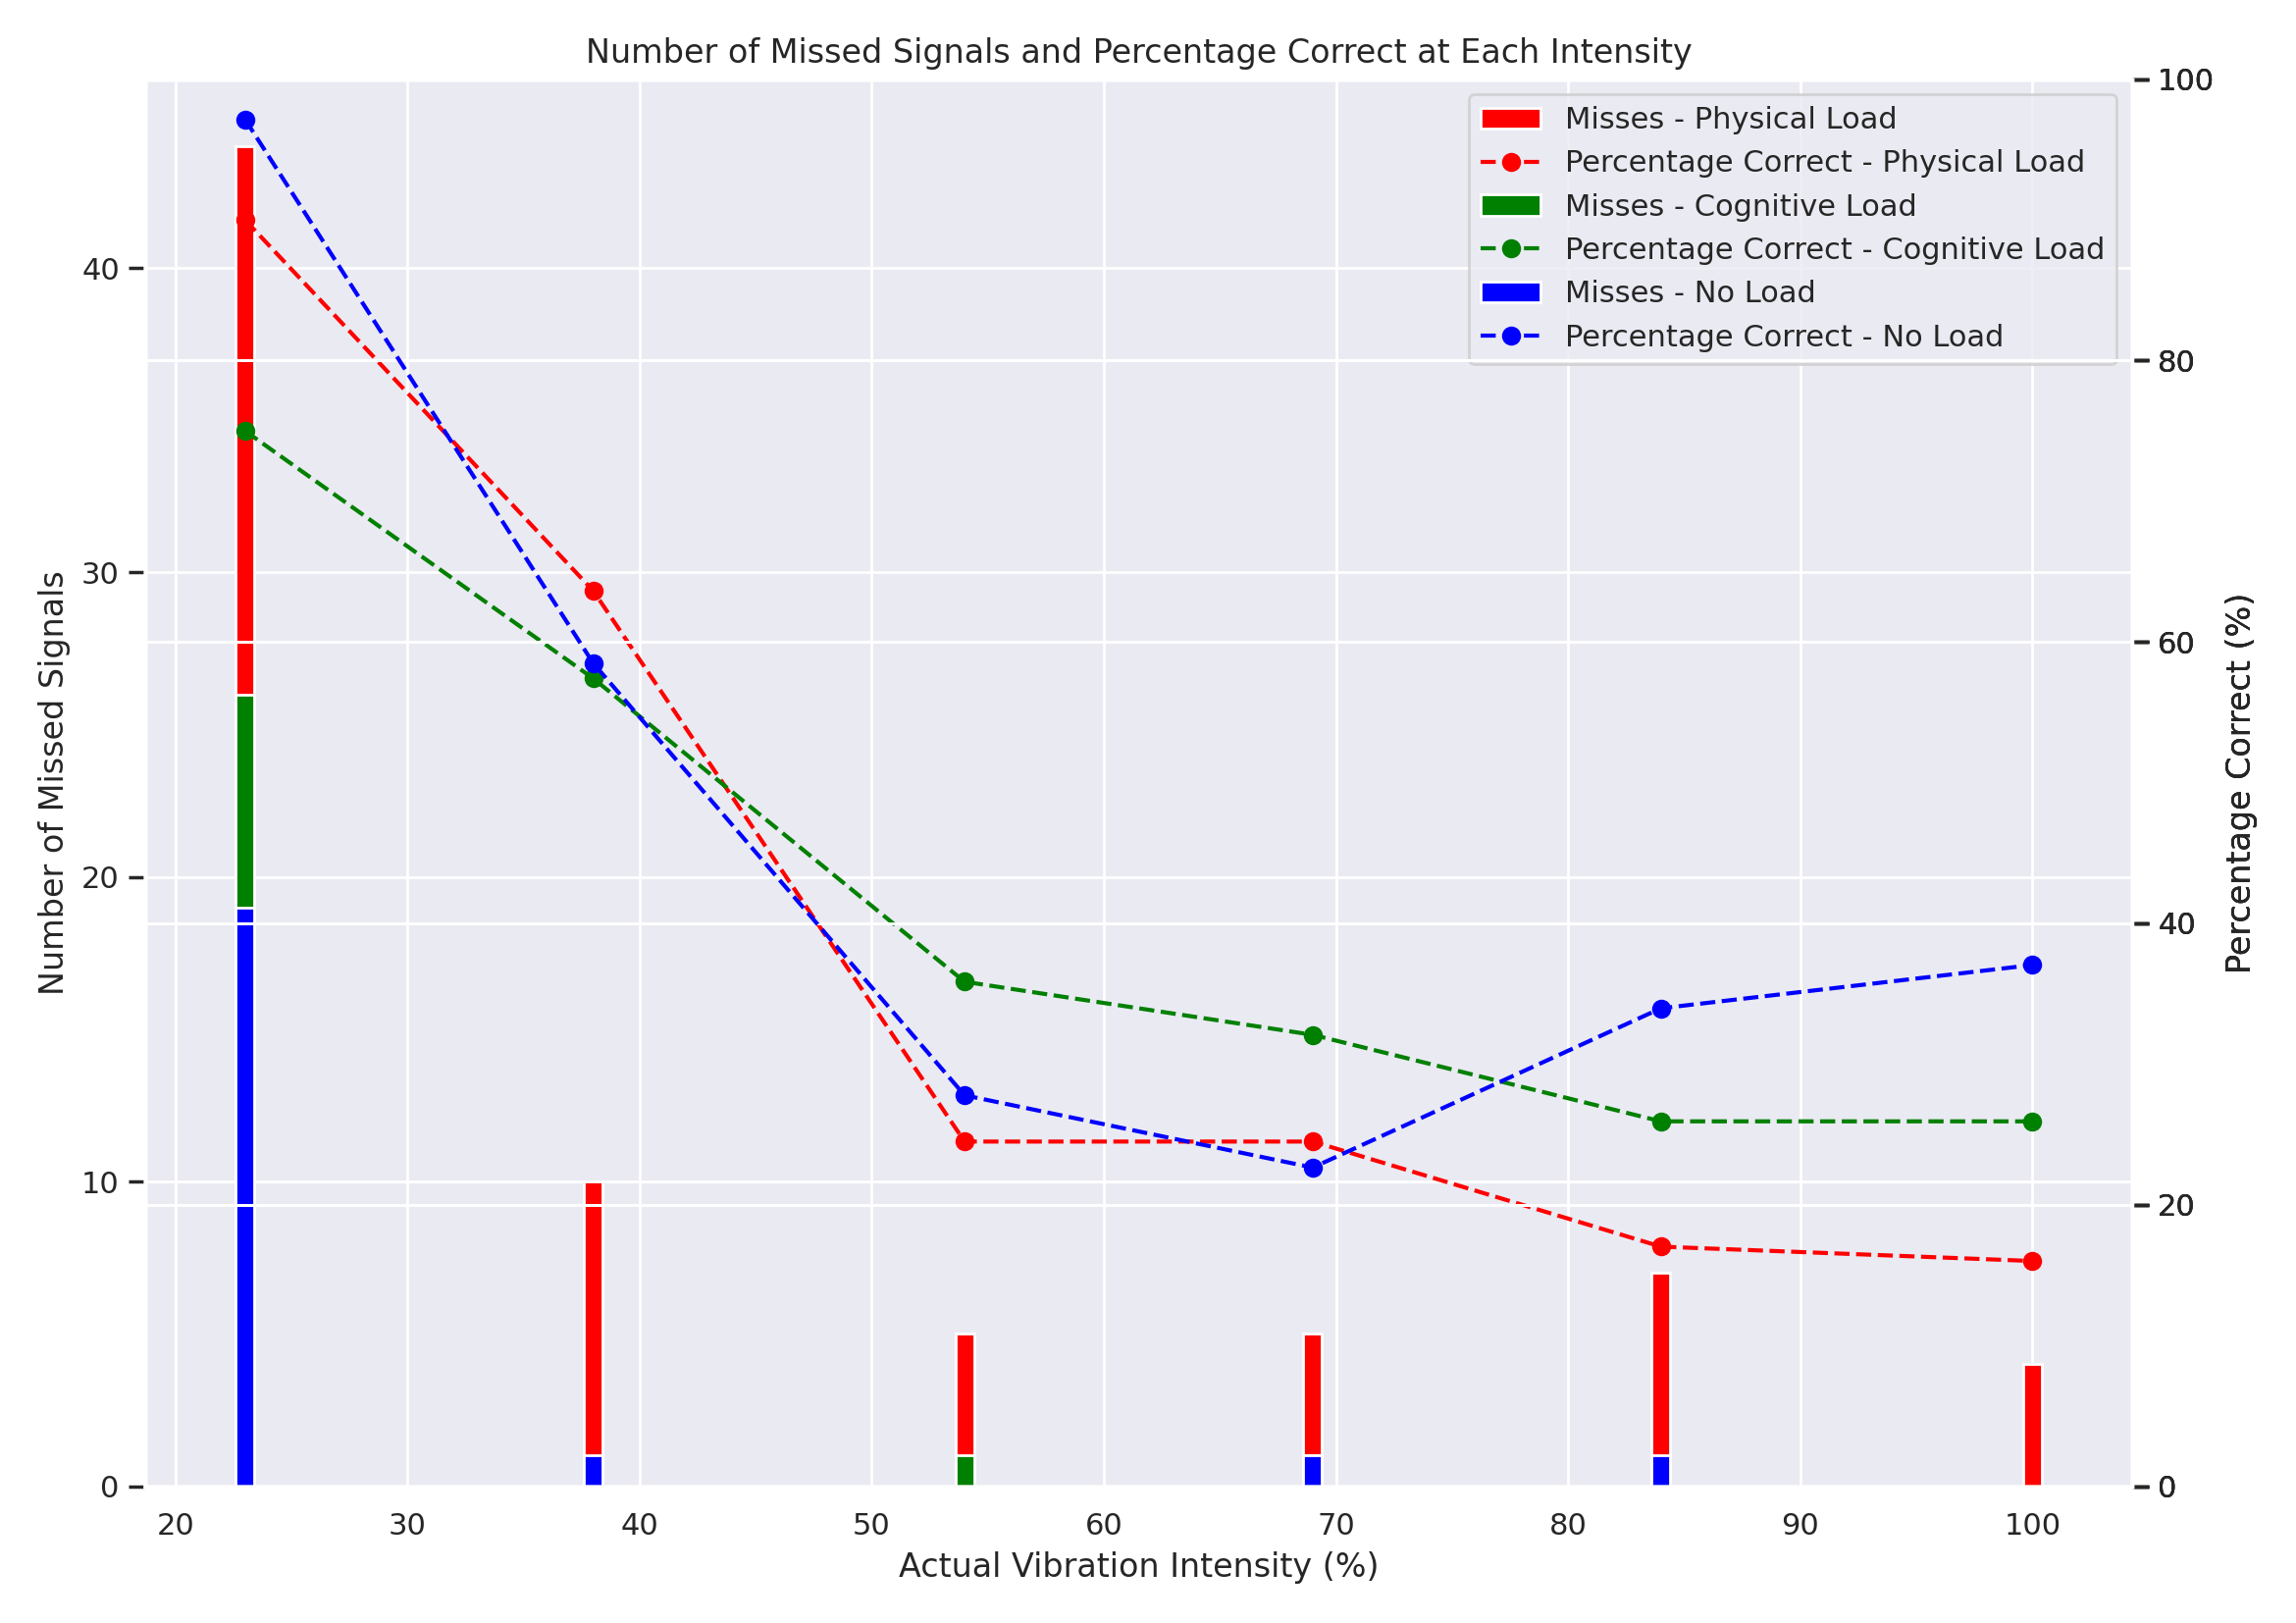

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for misses and correct judgments
organised_misses = {
    'none_miss': [19, 1, 0, 1, 1, 0],
    'seven_miss': [26, 0, 1, 1, 0, 0],
    'build_miss': [44, 10, 5, 5, 7, 4]
}
organised_correct = {
    'none_miss': [34, 31, 15, 12, 18, 20],
    'seven_miss': [21, 31, 19, 17, 14, 14],
    'build_miss': [9, 28, 12, 12, 8, 8]
}

intensity = [23, 38, 54, 69, 84, 100]

# Create DataFrames for misses and correct judgments
misses_df = pd.DataFrame(organised_misses)
correct_df = pd.DataFrame(organised_correct)

# Calculate the number perceived
perceived_judgments = 54 - misses_df

# Calculate percentage correct
percentage_correct = (correct_df / perceived_judgments) * 100

# Reset index for intensity column
misses_df['intensity'] = intensity
percentage_correct['intensity'] = intensity

# Melt the DataFrames for better visualization
melted_misses = misses_df.melt(id_vars=["intensity"], var_name="condition", value_name="misses")
melted_percentage_correct = percentage_correct.melt(id_vars=["intensity"], var_name="condition", value_name="percentage_correct")

# Merge the melted DataFrames
merged_df = pd.merge(melted_misses, melted_percentage_correct, on=["intensity", "condition"])

# Group the data by condition
grouped = merged_df.groupby('condition')

# Create a single plot for all conditions
fig, ax = plt.subplots(figsize=(11.7, 8.27))

# Keep track of handles and labels for the legends
handles = []
labels = []

# Condition names mapping
condition_names = {
    'none_miss': 'No Load',
    'seven_miss': 'Cognitive Load',
    'build_miss': 'Physical Load'
}

# Define the plotting order
plotting_order = ['build_miss', 'seven_miss', 'none_miss']

# Iterate over conditions in the specified order and plot the data
for condition in plotting_order:
    group = grouped.get_group(condition)

    # Choose colors based on condition
    if condition == 'none_miss':
        bar_color = 'blue'
        line_color = 'blue'
    elif condition == 'build_miss':
        bar_color = 'red'
        line_color = 'red'
    else:
        bar_color = 'green'
        line_color = 'green'

    # Plot the bar chart on the left y-axis
    bar = ax.bar(group["intensity"], group["misses"], color=bar_color, label=f'Misses - {condition_names[condition]}')
    handles.append(bar)
    labels.append(f'Misses - {condition_names[condition]}')

    # Create a secondary y-axis on the right for the line plot
    ax2 = ax.twinx()
    line = ax2.plot(group["intensity"], group["percentage_correct"], color=line_color, marker="o", linestyle="--", label=f'Percentage Correct - {condition_names[condition]}')
    ax2.set_ylabel('Percentage Correct (%)')
    ax2.set_ylim(0, 100)  # Set y-axis range to 0-100
    handles.extend(line)
    labels.append(f'Percentage Correct - {condition_names[condition]}')

ax.set_xlabel('Actual Vibration Intensity (%)')
ax.set_ylabel('Number of Missed Signals')
ax.set_title('Number of Missed Signals and Percentage Correct at Each Intensity')

# Combine legends for both axes
ax.legend(handles, labels, loc='upper right')

# Tight layout and show the plot
plt.tight_layout()
plt.show()


 # AVERAGE NUMBERS

In [ ]:
# Doing the average of perceived intensities and reaction times
from matplotlib.cbook import print_cycles
from IPython.core.interactiveshell import prefilter
print("Average perceived intensities")
print(np.average(none_df["pi"]))
print(np.average(seven_df["pi"]))
print(np.average(build_df["r"]))
print("\n")

print("Average reaction times")
print(np.average(none_df["r"]))
print(np.average(seven_df["r"]))
print(np.average(build_df["r"]))
print("\n")

# Doing the preferred intensity
averages_df = pd.read_excel('Results.xlsx')
pref = averages_df['Preferred Intensity']
refinedpref = []
for i in pref:
  if math.isnan(i):
    continue
  else:
    refinedpref.append(i)
print("Average Preferred Intensity: ", np.average(refinedpref), "\n")

# Doing the build progress
control = averages_df['EMG Control Type']
progress = averages_df['Build Progress (bricks assembled out of 48)']
refinedcontrol = []
refinedprog = []

for i in range(len(progress)):
  if math.isnan(progress[i]):
    continue
  else:
    refinedcontrol.append(control[i])
    refinedprog.append(progress[i])

dual = []
single = []
for i in range(len(refinedcontrol)):
  if refinedcontrol[i] == "dual":
    dual.append(refinedprog[i])
  else:
    single.append(refinedprog[i])

print("Of the : ", len(single)," participants who used the Single EMG:")
print(np.average(single), " is the average number of bricks assembled. \n")
print("Of the : ", len(dual)," participants who used the Single EMG:")
print(np.average(dual), " is the average number of bricks assembled. \n")

Average perceived intensities
160.47019867549668
154.86486486486487
1.0529718875502005


Average reaction times
0.7931125827814569
0.8000675675675676
1.0529718875502005


Average Preferred Intensity:  4.7407407407407405 

Of the :  11  participants who used the Single EMG:
11.909090909090908  is the average number of bricks assembled. 

Of the :  16  participants who used the Single EMG:
18.9375  is the average number of bricks assembled. 

